In [1]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


(360, 360)


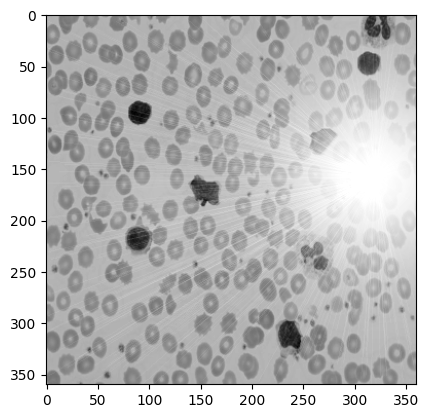

In [3]:
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/rice.bmp')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/cell.bmp')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/cell-bright.bmp')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images/milkdrop.bmp')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg.shape)
plt.imshow(gimg, cmap='gray')
#cv2_imshow(gimg)

In [4]:
N = 20

dimh = np.int32(gimg.shape[0]/N)
dimw = np.int32(gimg.shape[1]/N)

dh_rest = np.int32(gimg.shape[0]%N)
dw_rest = np.int32(gimg.shape[1]%N)

meanimg = np.zeros((N,N))
outimg = np.zeros((gimg.shape[0], gimg.shape[1]))

In [5]:
def mean_function(img, dimh, dimw, h, w):
  count = 1
  sum = 0
  avg = 0
  for y in range(h, h+dimh):
    for x in range(w, w+dimw):
      sum = sum + img[y,x]
      count = count + 1
  avg = np.int32(sum/count)
  return avg

In [6]:
for h in range(0, img.shape[0]-dh_rest, dimh):
  for w in range(0, img.shape[1]-dw_rest, dimw):
    meanimg[np.int32(h/dimh), np.int32(w/dimw)] = mean_function(gimg, dimh, dimw, h, w)

(20, 20)


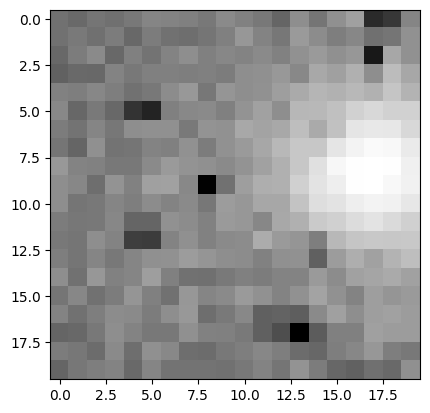

In [7]:
#cv2_imshow(meanimg)
plt.imshow(meanimg, cmap='gray')
print(meanimg.shape)

In [8]:
for h in range(0, gimg.shape[0]-dh_rest):
  for w in range(0, gimg.shape[1]-dw_rest):
    if(gimg[h,w] >= meanimg[np.int32(h/dimh), np.int32(w/dimw)]):
      outimg[h,w] = 255
    else:
      outimg[h,w] = 0

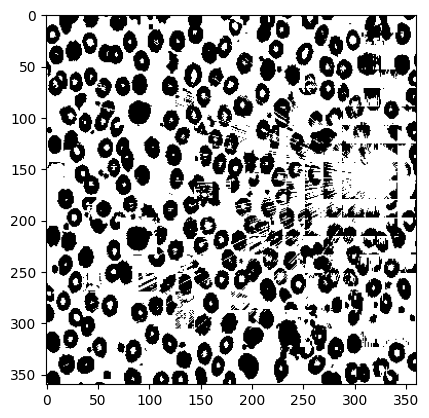

In [9]:
plt.imshow(outimg, cmap='gray')